In [1]:
import pandas as pd

Câu 1: Đọc dữ liệu lên dataframe

In [2]:
thietbi = pd.read_csv('./thietbi.csv')
nguoidung_thietbi = pd.read_csv('./nguoidung_thietbi.csv')
nguoidung_sudung = pd.read_csv('./nguoidung_sudung.csv')

Câu 3: Đổi tên các cột dữ liệu cần thiết

In [3]:
thietbi.rename(columns={'Retail Branding' : 'Branding', 'Marketing Name' : 'MarketingName'}, inplace=True)

Câu 4: Trộn bảng nguoidung_sudung và nguoidung_thietbi thông qua inner join để được bảng 
kết quả có các cột sau: [outgoing_mins_per_month, outgoing_sms_per_month, 
monthly_mb, use_id, platform, device]

In [4]:
dfKetQua = pd.merge(nguoidung_sudung, nguoidung_thietbi[['use_id','platform','device']], on='use_id')
dfKetQua

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F
...,...,...,...,...,...,...
154,198.59,90.49,5191.12,23043,android,SM-G900F
155,198.59,90.49,3114.67,23044,android,SM-G900F
156,106.65,82.13,5191.12,23046,android,Moto G (4)
157,344.53,20.53,519.12,23049,android,SM-G900F


Câu 5: Tiếp tục inner-join bảng thietbi và dfKetQua để có thêm 2 cột Model và Branding trong 
bảng kết quả cuối cùng. Lưu ý ở đây khóa liên kết sẽ khác tên

In [5]:
dfKetQua = pd.merge(dfKetQua, thietbi[['Branding', "Model"]], left_on='device', right_on='Model')
dfKetQua

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F,Samsung,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F,Samsung,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303,Sony,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F,Samsung,SM-G361F
...,...,...,...,...,...,...,...,...
196,106.65,82.13,5191.12,23046,android,Moto G (4),Motorola,Moto G (4)
197,106.65,82.13,5191.12,23046,android,Moto G (4),Motorola,Moto G (4)
198,344.53,20.53,519.12,23049,android,SM-G900F,Samsung,SM-G900F
199,42.75,46.83,5191.12,23053,android,Vodafone Smart ultra 6,Vodafone,Vodafone Smart ultra 6


Câu 6: Hãy liệt kê 5 dòng đầu tiên các mẫu thiết bị (cột device) bắt đầu bằng GT

In [6]:
dfKetQua[dfKetQua.device.str.startswith('GT')].head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
8,69.80,14.70,25955.55,22801,android,GT-I9505,Samsung,GT-I9505
10,189.10,24.08,519.12,22805,android,GT-I9195,Samsung,GT-I9195
29,85.97,26.94,407.01,22831,android,GT-I8190N,Samsung,GT-I8190N
52,29.54,34.78,33.79,22871,android,GT-I9300,Samsung,GT-I9300


Câu 7: Hãy thống kê trung bình số phút hàng tháng, trung bình sms và trung bình data, số lượng 
sử dụng của các nhãn hàng

In [7]:
dfKetQua.groupby('Branding').agg({
    'outgoing_mins_per_month' : 'mean',
    'outgoing_sms_per_month' : 'mean',
    'monthly_mb' : 'mean',
    'use_id' : 'count'
})

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
Branding,,,,
HTC,299.842955,93.059318,5144.077955,44
Huawei,81.526667,9.500000,1561.226667,3
LGE,111.530000,12.760000,1557.330000,2
Lava,60.650000,261.900000,12458.670000,2
Lenovo,215.920000,12.930000,1557.330000,2
Motorola,95.127500,65.666250,3946.500000,16
OnePlus,354.855000,48.330000,6575.410000,6
Samsung,191.010093,92.390463,4017.318889,108
Sony,177.315625,40.176250,3212.000625,16


Câu 8: Trực quan số lượng người dùng các nhãn hàng

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib created a temporary cache directory at C:\Users\FPT-ACER\AppData\Local\Temp\matplotlib-7auhhchp because the default path (C:\Users\FPT-ACER\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


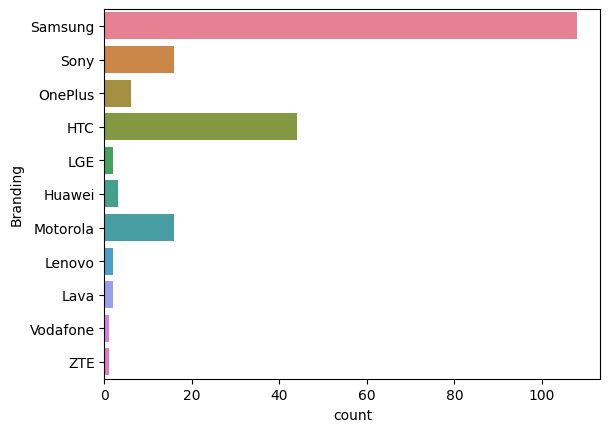

In [9]:
sns.countplot(y='Branding',hue='Branding', data=dfKetQua)
plt.show()

Câu 9: Trực quan hóa dữ liệu trung bình phút gọi, trung bình sms và dung lượng sử dụng trên 
từng nhóm nhãn hàng bán lẻ 

In [10]:
import numpy as np

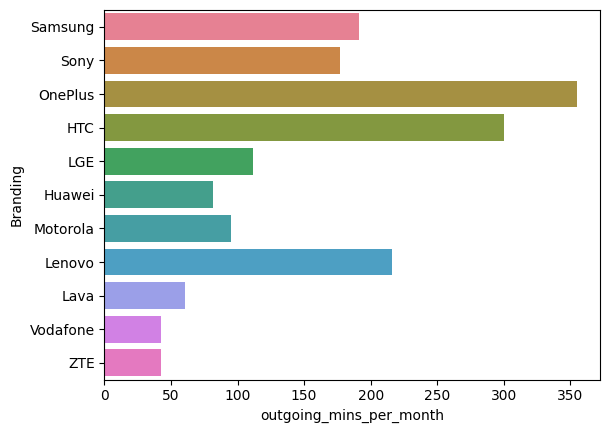

In [11]:
sns.barplot(x='outgoing_mins_per_month', y='Branding', hue='Branding', errorbar=None, data=dfKetQua)
plt.show()

Câu 10: Khảo sát tương quan giữa phút gọi, sms và dung lượng trên từng nhóm nhãn hàng

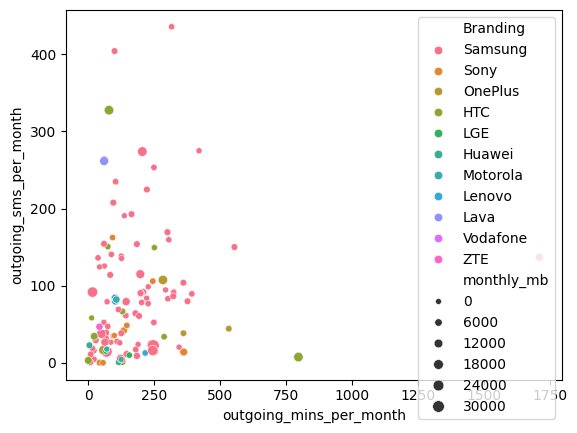

In [12]:
sns.scatterplot(
    data=dfKetQua,
    y='outgoing_sms_per_month',
    x='outgoing_mins_per_month',
    hue='Branding', 
    size='monthly_mb'
)
plt.show()

Câu 11: Hãy kiểm định xem trung bình outgoing_mins_per_month có bằng 200 phút

In [13]:
from statsmodels.stats.weightstats import ztest as ztest

In [14]:
ztest(dfKetQua['outgoing_mins_per_month'], value=200)

(np.float64(0.3678324474067915), np.float64(0.7129981730830808))

- Do pvalue > α nên không bác bỏ Ho rằng trung bình outgoing_mins_per_month bằng 200. Chưa đủ dữ kiện để khẳng định trung bình trung bình outgoing_mins_per_month khác 200.

Câu 12:  Hãy kiểm định xem trung bình outgoing_sms_per_month có bằng 100 tin nhắn

In [15]:
ztest(dfKetQua['outgoing_sms_per_month'], value=100)

(np.float64(-2.9567085781961198), np.float64(0.0031094184670620866))

- Do pvalue <= α nên bác bỏ Ho rằng trung bình outgoing_sms_per_month bằng 100. Đủ bằng chứng thống kê cho thấy trung bình của cột này khác 100

Câu 13: Hãy kiểm định xem trung bình monthly_mb có bằng 2048 mb

In [16]:
ztest(dfKetQua['monthly_mb'], value=2048)

(np.float64(5.918078326415772), np.float64(3.257248511198872e-09))

- Do pvalue <= α nên bác bỏ Ho rằng trung bình monthly_mb bằng 2048. Đủ bằng chứng thống kê cho thấy trung bình của cột này khác 2048

Câu 14: Hãy tạo ma trận tương quan giữa [outgoing_mins_per_month, outgoing_sms_per_month, 
monthly_mb] và sắp xếp tăng dần về mức độ tương quan

In [17]:
dfKetQua[['outgoing_mins_per_month','outgoing_sms_per_month','monthly_mb']].corr()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb
outgoing_mins_per_month,1.000000,-0.016494,0.213489
outgoing_sms_per_month,-0.016494,1.000000,-0.046049
monthly_mb,0.213489,-0.046049,1.000000


Câu 15: Kiểm định xem outgoing_mins_per_month, outgoing_sms_per_month có tương quan

In [18]:
from scipy.stats.stats import pearsonr

C:\Users\FPT-ACER\AppData\Local\Temp\ipykernel_28112\4005289447.py:1: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [19]:
pearsonr(dfKetQua['outgoing_mins_per_month'], dfKetQua['outgoing_sms_per_month'])

PearsonRResult(statistic=np.float64(-0.01649444168531939), pvalue=np.float64(0.8162223636414785))

- Do pvalue > α nên không bác bỏ Ho. Không đủ dữ kiện kết luận có sự tương quan tuyến tính giữa 2 biến

In [20]:
# Quyết định:
# Nếu p_value < alpha (thường là 0.05), bạn bác bỏ giả thuyết không và kết luận rằng có mối tương quan có ý nghĩa thống kê giữa hai biến.
# Nếu p_value >= alpha, bạn không bác bỏ giả thuyết không và kết luận rằng không có mối tương quan có ý nghĩa thống kê giữa hai biến.

Câu 16: Hãy kiểm định xem có mối quan hệ nào giữa platform và branding

In [21]:
crosdata = pd.crosstab(dfKetQua['platform'], [dfKetQua['Branding']], rownames=['platform'], colnames=['Branding'])
crosdata

Branding,HTC,Huawei,LGE,Lava,Lenovo,Motorola,OnePlus,Samsung,Sony,Vodafone,ZTE
platform,,,,,,,,,,,
android,44,3,2,2,2,16,6,108,16,1,1


In [22]:
from scipy.stats import chi2_contingency

In [23]:
stat, p, dof, expected = chi2_contingency(crosdata)

alpha = 0.05
print("p value is " + str(p))
if p < alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)


In [24]:

from scipy.stats import chi2_contingency

# Giả sử dfKetQua là một DataFrame chứa dữ liệu
# Đọc dữ liệu từ file CSV hoặc DataFrame
# dfKetQua = pd.read_csv('path_to_your_file.csv')

# Tạo bảng chéo giữa platform và branding
contingency_table = pd.crosstab(dfKetQua['platform'], dfKetQua['Branding'])

# Thực hiện kiểm định chi bình phương
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"Giá trị P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

# Kiểm định giả thuyết
alpha = 0.05
if p < alpha:
    print("Có mối quan hệ có ý nghĩa thống kê giữa platform và branding.")
else:
    print("Không có mối quan hệ có ý nghĩa thống kê giữa platform và branding.")

Chi-square statistic: 0.0
Giá trị P-value: 1.0
Degrees of freedom: 0
Expected frequencies:
[[ 44.   3.   2.   2.   2.  16.   6. 108.  16.   1.   1.]]
Không có mối quan hệ có ý nghĩa thống kê giữa platform và branding.


Câu 17: Hãy kiểm định xem có mối quan hệ nào giữa monthly_mb và platform

In [25]:
crosdata2 = pd.crosstab(dfKetQua['monthly_mb'], [dfKetQua['platform']], rownames=['monthly_mb'], colnames=['platform'])

stat, p, dof, expected = chi2_contingency(crosdata2)

alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)


Câu 18: Hãy kiểm định xem có mối quan hệ nào giữa monthly_mb và platform theo loại branding

In [32]:
import pandas as pd
from scipy.stats import f_oneway

# Giả sử dfKetQua là một DataFrame chứa dữ liệu
# Đọc dữ liệu từ file CSV hoặc DataFrame
# dfKetQua = pd.read_csv('path_to_your_file.csv')

# Lấy danh sách các loại branding
branding_types = dfKetQua['Branding'].unique()

# Thực hiện kiểm định ANOVA cho từng loại branding
for branding in branding_types:
    # Lọc dữ liệu theo loại branding
    df_branding = dfKetQua[dfKetQua['Branding'] == branding]
    
    # Lấy danh sách các nhóm platform
    platforms = df_branding['platform'].unique()
    
    # Tạo danh sách các nhóm dữ liệu monthly_mb theo platform
    groups = [df_branding[df_branding['platform'] == platform]['monthly_mb'] for platform in platforms]
    
    # Thực hiện kiểm định ANOVA
    f_stat, p_value = f_oneway(*groups)
    
    print(f"Branding: {branding}")
    print(f"F-statistic: {f_stat}")
    print(f"Giá trị P-value: {p_value}")
    
    # Kiểm định giả thuyết
    alpha = 0.05
    if p_value < alpha:
        print("Có mối quan hệ có ý nghĩa thống kê giữa monthly_mb và platform trong loại branding này.")
    else:
        print("Không có mối quan hệ có ý nghĩa thống kê giữa monthly_mb và platform trong loại branding này.")
    print("\n")

KeyError: 'branding'

In [26]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [27]:
model = ols('monthly_mb ~ platform + Branding + platform:Branding', data=dfKetQua).fit()
result = sm.stats.anova_lm(model, type=2)
print(result)

                      df        sum_sq       mean_sq         F    PR(>F)
platform             0.0  0.000000e+00           NaN       NaN       NaN
Branding            10.0  2.792153e+08  2.792153e+07  0.974799  0.466796
platform:Branding    0.0  0.000000e+00           NaN       NaN       NaN
Residual           190.0  5.442239e+09  2.864336e+07       NaN       NaN


- Do pvalue > α => Branding không ảnh hưởng lớn đến monthly_mb
- platform và platform:Branding có pvalue là NaN => không có ảnh hưởng 

Câu 19: Phân tích sự ảnh hưởng của outgoing_mins_per_month, outgoing_sms_per_month đến
monthly_mb dựa trên mô hình hồi quy tuyến tính

In [28]:
import statsmodels.api as sm

In [29]:
X_with_constant = sm.add_constant(dfKetQua[['outgoing_mins_per_month','outgoing_sms_per_month']].values)
y = dfKetQua[['monthly_mb']].values
result = sm.OLS(y, X_with_constant).fit()
print(result.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     4.925
Date:                Sat, 05 Oct 2024   Prob (F-statistic):            0.00818
Time:                        23:29:13   Log-Likelihood:                -2005.3
No. Observations:                 201   AIC:                             4017.
Df Residuals:                     198   BIC:                             4027.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3513.0441    631.350      5.564      0.0

Kết quả - Kết luận:
- R-squared ~ 4,7% sự biến thiên của monthly_mb => mô hình chưa giải thích được nhiều sự biến thiên trong các biến phụ thuộc
- Prob (F-statistic):0.00818 <= α cho thấy mô hình hồi quy có ý nghĩa thống kê, tức là ít nhất một trong các biến độc lập có ảnh hưởng đáng kể đến biến phụ thuộc.

- P>|t| của x1 ~ 0.002 < α => Có sự ảnh hưởng lớn của outgoing_mins_per_month đến monthly_mb
- P>|t| của x2 ~ 0.54 >= α => Không có sự ảnh hưởng lớn của outgoing_sms_per_month đến monthly_mb

Câu 20: Dựa trên mô hình hồi quy tuyến tính hãy cho biết nếu outgoing_mins_per_month,
outgoing_sms_per_month lần lượt là 50 phút, 75 tin nhắn thì tháng đó người dùng sẽ tiêu
hao bao nhiêu dung lượng internet (mb) cho quá trình sử dụng.

Giải: 3513.0441 + 4.8782 * 50 - 2.8500 * 75 = 3543.2041

Xây dựng phần mềm

In [30]:
def predict_monthly_mb(a, b):
    return 3513.0441 + 4.8782*a -2.8500*b

def main():
    num1 = float(input("Nhập outgoing_mins_per_month: "))
    num2 = float(input("Nhập outgoing_sms_per_month: "))
    result = predict_monthly_mb(num1, num2)
    print(result)

In [31]:
main()

ValueError: could not convert string to float: ''